In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('../Data/cleanedData/cleaned_data.csv')

In [38]:
# Danh sách các cột cần thay đổi
columns_to_encode = ['Xã/Phường', 'Quận/Huyện', 'Chủ đầu tư', 'Tên dự án', 'Pháp lý', 'Nội thất']

# Thay giá trị các cột bằng index tương ứng
for col in columns_to_encode:
    unique_values = data[col].drop_duplicates().reset_index(drop=True)  # Loại bỏ trùng lặp và reset index
    mapping = {value: idx for idx, value in enumerate(unique_values)}  # Tạo ánh xạ giá trị -> index
    data[col] = data[col].map(mapping)  # Thay thế giá trị bằng index

data.drop(columns=['Mã lịch sử giá'], inplace=True)


<Figure size 1000x600 with 0 Axes>

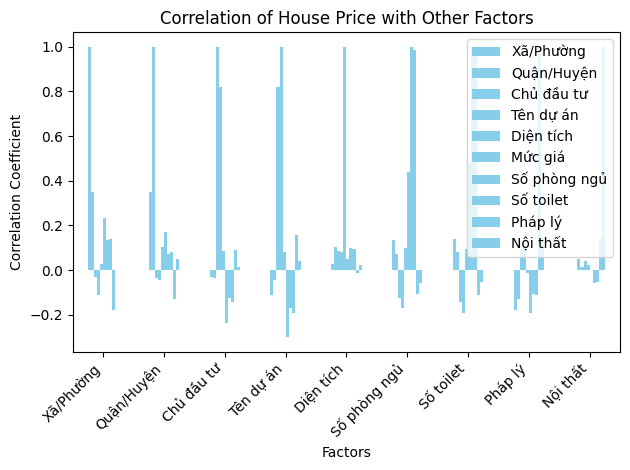

In [ ]:
correlation_matrix = data.corr()

# Lọc tương quan với giá nhà và loại bỏ giá trị tương quan với chính nó (giá trị 1)
correlation_with_price = correlation_matrix['Mức giá'].drop('Mức giá')  # Giữ lại tương quan với giá nhà, loại bỏ giá trị 1

# Vẽ biểu đồ cột thể hiện sự tương quan giữa giá nhà và các yếu tố khác
plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar', color='skyblue')

# Thêm tiêu đề và các nhãn
plt.title("Correlation of House Price with Other Factors")
plt.xlabel("Factors")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')  # Xoay nhãn cột cho dễ đọc
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()